In [105]:
# Librerias necesarias
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [10]:
# Leer el data set
import pandas as pd
df0 = pd.read_csv('customer_shopping_data.csv')
df0.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [24]:
# Determinar la cantidad de registros de la tabla (el resultado es una tupla)
df0.shape

(99457, 10)

In [21]:
# Informacion general para el df0
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [35]:
# determinar los valores unicos del atributo
print("Valores Unicos en gender:", df0['gender'].unique())

# determinar los valores diferentes del atributo
print("Numero de Valores Unicos:", df0['gender'].nunique())


Valores Unicos en gender: ['Female' 'Male']
Numero de Valores Unicos: 2


In [38]:
# determinar los valores unicos del método de pago
print("Valores Unicos del metodo de pago:", df0['payment_method'].unique())


Valores Unicos del metodo de pago: ['Credit Card' 'Debit Card' 'Cash']


In [40]:
# Copiamos y creamos un df con la data inicial para no altererla
df1 = df0.copy()

In [46]:
# Convertir un atributo "object" a "date" ya que el dato de fecha del df no es el correcto
df1["invoice_date"] = pd.to_datetime(df1["invoice_date"], dayfirst=True)

In [50]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB
None


In [55]:
# Agregar columnas para años, meses y dias
df1["year"] = df1["invoice_date"].dt.year
df1["month"] = df1["invoice_date"].dt.month
df1["day"] = df1["invoice_date"].dt.day
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  year            99457 non-null  int32         
 11  month           99457 non-null  int32         
 12  day             99457 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(6)
memory usage: 8.7+ MB
None


### 1) Cómo es la relacion de género y número de transacciones

In [88]:
#Determinar la cantidad de personas por genero
df1["gender"].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

[Text(0.5, 1.0, 'relacion de género y número de transacciones')]

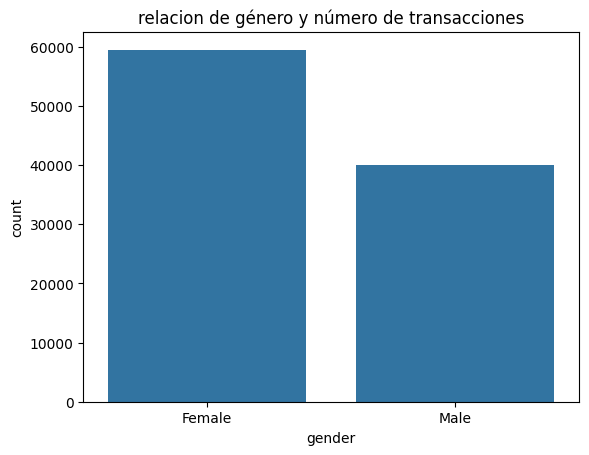

In [95]:
#Graficacion de la cantidad de personas por genero usando seaborn

sb.countplot(data=df1, x='gender').set(title = 'relacion de género y número de transacciones')

In [113]:
# Cantidad de personas por categoría "genero" usando una nueva variable

gender_qty = df1['gender'].value_counts()
print(gender_qty)


gender
Female    59482
Male      39975
Name: count, dtype: int64


Text(0.5, 1.0, 'Relacion de transacciones por genero')

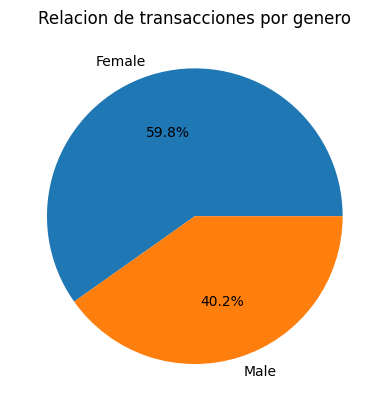

In [114]:
# Graficando la relación utilizando maploptlib

plt.pie(gender_qty, labels=gender_qty.index, autopct= '%1.1f%%')
plt.title("Relacion de transacciones por genero")

### 2) Cómo es la distribución de edades por número de transacciones

In [120]:
#Creamos itro df
df2 = df1.copy()

In [122]:
# visualizar datos promedios
df2['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [142]:
# Crear nueva columna para incluir las categorías de edades

df2['age_cat'] = df2['age']

In [124]:

# Construir la funcion en python para categorias por edades
# "Generacion Z (18-24)" / "Generacion Y (25-34)" / "Generacion X (35-49)" / "Baby Boomers (mayor 65)"
# "Generacion S"

def category_f(age):
    if (age >=18) and (age < 25):
        return "18-24"
    elif (age >= 25) and (age < 35):
        return "25-34"
    elif (age >= 35) and  (age < 50):
        return "35-49"
    elif (age >= 50) and (age < 65):
        return "50-64"
    else:
        return ">65"

In [126]:
#
df2['age_cat'] = df2[ 'age_cat'].apply(category_f)

In [129]:
df2.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,day,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,5,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,12,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,9,18-24


In [132]:
# Confirmar que la función corrió correctamente
df2[['age', 'age_cat']].tail(5)

,age,age_cat
99452,45,35-49
99453,27,25-34
99454,63,50-64
99455,56,50-64
99456,36,35-49


[Text(0.5, 1.0, 'Edades por transaccion')]

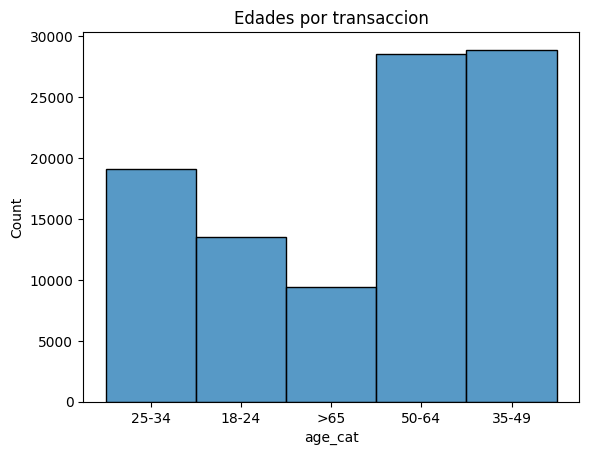

In [136]:
# Histograma

sb.histplot(data=df2, x='age_cat').set(title='Edades por transaccion')

### 3) ¿Qué grupo de edad gastó más dinero?

In [140]:
df3 = df2.copy()

In [144]:
# Crear nueva columna para incluir el total por operacion (precio unitario x cantidad)

df3['total'] =  df3['quantity'] * df3['price']

In [157]:
# Visualizar los datos para validar la operación anterior
df3[['total', 'quantity', 'price']].tail()

,total,quantity,price
99452,293.25,5,58.65
99453,20.92,2,10.46
99454,20.92,2,10.46
99455,16800.00,4,4200.00
99456,105.57,3,35.19


In [159]:
# se creo un nuevo df con una agrupación por categoria para realizar la operacion y 
df_age_total = df3.groupby('age_cat')['total'].sum()
print(df_age_total)

age_cat
18-24    33454083.87
25-34    47805115.52
35-49    74358776.99
50-64    71961241.44
>65      23926576.43
Name: total, dtype: float64


<Axes: xlabel='age_cat'>

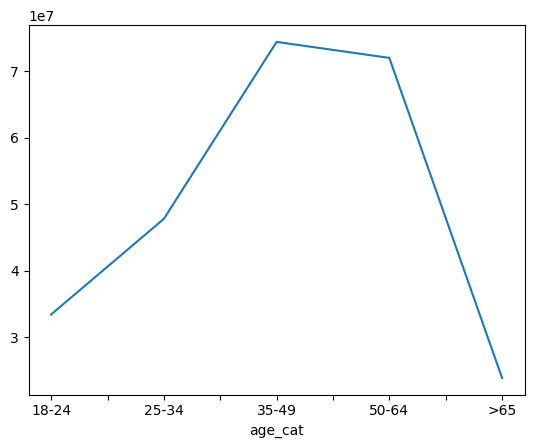

In [160]:
# Plot
df_age_total.plot()